In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

In [2]:
# !pip install openpyxl

In [159]:
def box_print(str_w):
    hbar = len(str_w) + 4
    print('-'*hbar + '\n| ' + str_w + ' |\n' + '-'*hbar)
    
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def plot_trainTest(X_train, X_test, y_train, y_test):    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=80)
#     plt.scatter(X_test[:, 0], X_test[:, 1], c='r', s=80, marker = 'x')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=80, marker = 'x')
    plt.xlim(-0.05,0.5)
    plt.ylim(-0.05,8)    
    
    

# Cargando datos

In [160]:
df = pd.read_excel('./data/salud.xlsx')
df["label"] = df["resultado"].replace(["sana","quiebra"],[0,1])
df = df[["x1","x2","label"]]
df


,x1,x2,label
0,0.3450,4.1870,0
1,0.2430,3.9940,0
2,0.0500,2.7778,1
3,0.3780,4.0360,0
4,0.0400,1.2560,1
5,0.0500,1.3770,1
6,0.1800,4.8700,0
7,0.0400,1.1430,1
8,0.2200,3.6350,0
9,0.0010,1.9870,1


In [116]:
X, y = df.values[:,:2], df.values[:,2]

(-0.05, 8.0)

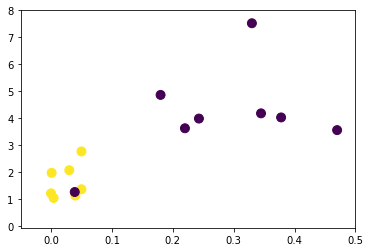

In [117]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=80)
plt.xlim(-0.05,0.5)
plt.ylim(-0.05,8)

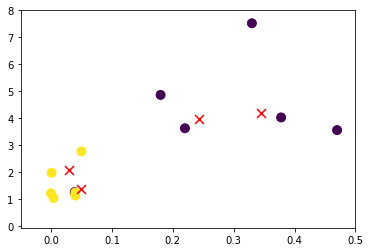

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
plot_trainTest(X_train, X_test, y_train, y_test)

# Modelo

In [119]:
model = SVC(kernel = "linear", C = 1e4).fit(X_train, y_train)


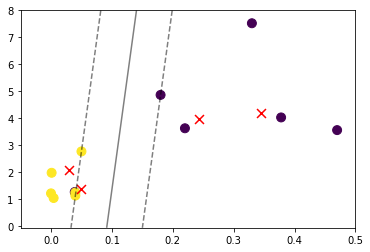

In [152]:
plot_trainTest(X_train, X_test, y_train, y_test)
plot_svc_decision_function(model)

(-0.05, 8.0)

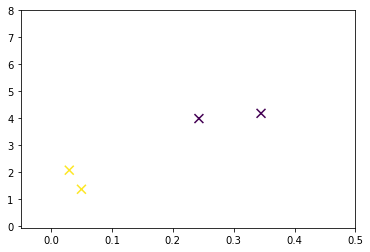

In [153]:
y_pred = model.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=80, marker = 'x')
plt.xlim(-0.05,0.5)
plt.ylim(-0.05,8)


In [127]:
acc = accuracy_score(y_true = y_test, y_pred=y_pred)
print(f'Accuracy Score: {100*acc}%')

Accuracy Score: 100.0%


# Validación cruzada

In [ ]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    print("\n\nTRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     plot_trainTest(X_train, X_test, y_train, y_test)
#     plt.show()
    
#     model = SVC(kernel = "linear", C = 1e4).fit(X_train, y_train)
    model = SVC(kernel = "linear").fit(X_train, y_train)
#     model = SVC(kernel = "poly", degree = 3).fit(X_train, y_train)
#     model = SVC(kernel = "rbf").fit(X_train, y_train)
#     model = SVC(kernel = "sigmoid").fit(X_train, y_train)
    plot_trainTest(X_train, X_test, y_train, y_test)
    plot_svc_decision_function(model)
    plt.show()
    
    y_pred = model.predict(X_test)

    print(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    box_print(f'Accuracy Score: {100*acc}%')
    
    

# Otros datos

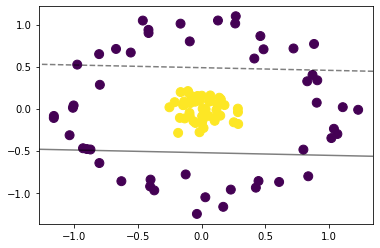

In [179]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=80)
plot_svc_decision_function(clf, plot_support=False);

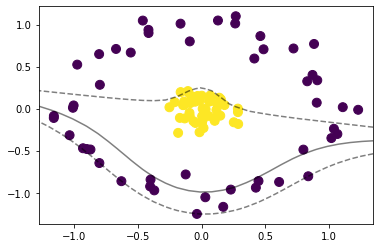

In [183]:
clf = SVC(kernel='poly', degree = 3)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=80)
plot_svc_decision_function(clf, plot_support=False);

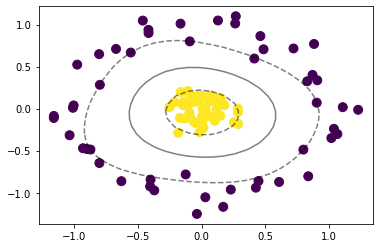

In [184]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=80)
plot_svc_decision_function(clf, plot_support=False);

# References:
[1] [https://scikit-learn.org/stable/modules/svm.html#kernel-functions](https://scikit-learn.org/stable/modules/svm.html#kernel-functions)
[2] [https://en.wikipedia.org/wiki/Kernel_method](https://en.wikipedia.org/wiki/Kernel_method)